<a href="https://colab.research.google.com/github/dbenayoun/IASD/blob/main/DeepLearning_Caz01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
# Input and output data for XOR
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

In [ ]:
# Create the model
model = Sequential([
    Dense(10, input_dim=2, activation='tanh'),  # Hidden layer with 5 neurons
    Dense(1, activation='sigmoid')             # Output layer with 1 neuron
])

sgd = SGD(learning_rate=0.1)
# Compile the model
model.compile(optimizer=sgd, loss='mse')

# Train the model
model.fit(inputs, outputs, epochs=1000, verbose=0, batch_size=1)

print(model.predict(inputs))

1/1 [==============================] - 0s 51ms/step
[[0.02837612]
 [0.9531352 ]
 [0.95738196]
 [0.05089878]]


# MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_images, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2623 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1077 - accuracy: 0.9677
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0704 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0516 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9793
test_acc: 0.9793000221252441


1/1 [==============================] - 0s 21ms/step
[[7.1790041e-08 2.9197517e-08 5.3839918e-05 5.9052290e-05 3.0551915e-11
  1.2919945e-08 5.4070502e-12 9.9988556e-01 2.9212882e-07 1.2026898e-06]]


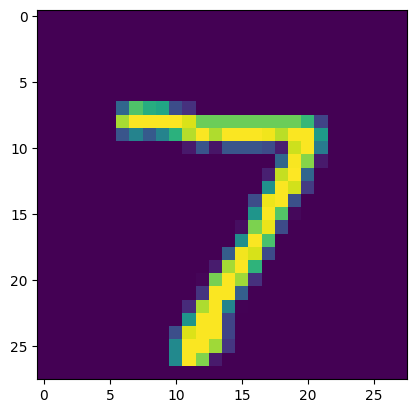

In [ ]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [0])
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
img = test_images [0].reshape ((1, 28*28))
print(network.predict(img))

# IMBD

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(10000,)))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

x_val = x_train[:10000]

partial_x_train = x_train[10000:]

y_val = y_train[:10000]

partial_y_train = y_train[10000:]


In [ ]:
model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit (partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 189ms/step - loss: 0.5308 - acc: 0.7929 - val_loss: 0.4147 - val_acc: 0.8611
Epoch 2/20
30/30 [==============================] - 3s 96ms/step - loss: 0.3434 - acc: 0.8921 - val_loss: 0.3329 - val_acc: 0.8750
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2614 - acc: 0.9111 - val_loss: 0.2894 - val_acc: 0.8875
Epoch 4/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2125 - acc: 0.9298 - val_loss: 0.2832 - val_acc: 0.8872
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1796 - acc: 0.9407 - val_loss: 0.2735 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 2s 78ms/step - loss: 0.1569 - acc: 0.9491 - val_loss: 0.2786 - val_acc: 0.8874
Epoch 7/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1351 - acc: 0.9573 - val_loss: 0.2924 - val_acc: 0.8814
Epoch 8/20
30/30 [==============================] - 2s 71ms/step - loss: 0.1169 - 

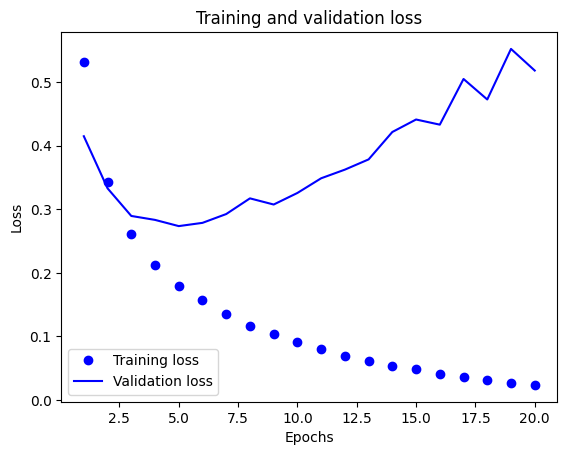

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

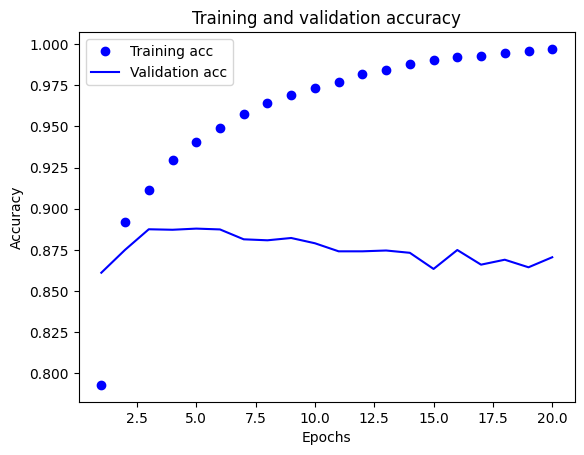

In [ ]:
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Reuters

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #softmax to get values between 0 and 1 and so having a prob distribution of the class

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.6181 - accuracy: 0.5333 - val_loss: 1.7711 - val_accuracy: 0.6240
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4859 - accuracy: 0.6933 - val_loss: 1.3543 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 1s 61ms/step - loss: 1.1424 - accuracy: 0.7541 - val_loss: 1.1733 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 1s 57ms/step - loss: 0.9329 - accuracy: 0.7964 - val_loss: 1.0733 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.7683 - accuracy: 0.8321 - val_loss: 1.0007 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 69ms/step - loss: 0.6373 - accuracy: 0.8649 - val_loss: 0.9476 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 94ms/step - loss: 0.5288 - accuracy: 0.8893 - val_loss: 0.9523 - val_accuracy: 0.7900
Epoch 8/20
16

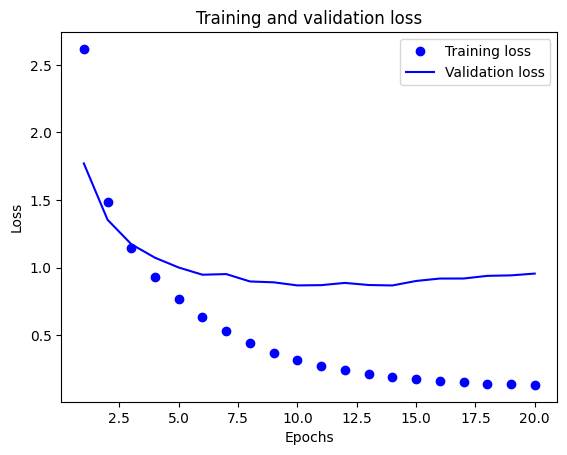

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Regression

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# MNIST 2


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
118/118 [==============================] - 4s 20ms/step - loss: 1.9876 - accuracy: 0.4154 - val_loss: 1.0550 - val_accuracy: 0.8045
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.7770 - accuracy: 0.7723 - val_loss: 0.4102 - val_accuracy: 0.8920
Epoch 3/10
118/118 [==============================] - 2s 19ms/step - loss: 0.5173 - accuracy: 0.8468 - val_loss: 0.3233 - val_accuracy: 0.9087
Epoch 4/10
118/118 [==============================] - 2s 20ms/step - loss: 0.4317 - accuracy: 0.8700 - val_loss: 0.2817 - val_accuracy: 0.9193
Epoch 5/10
118/118 [==============================] - 2s 19ms/step - loss: 0.3869 - accuracy: 0.8864 - val_loss: 0.2506 - val_accuracy: 0.9274
Epoch 6/10
118/118 [==============================] - 2s 19ms/step - loss: 0.3552 - accuracy: 0.8950 - val_loss: 0.2309 - val_accuracy: 0.9332
Epoch 7/10
118/118 [==============================] - 2s 19ms/step - loss: 0.3339 - accuracy: 0.9012 - val_loss: 0.2190 - val_accuracy: 0.9371

In [ ]:
score = model.evaluate(x_test, y_test)
score

313/313 [==============================] - 1s 3ms/step - loss: 0.1815 - accuracy: 0.9479


[0.18153692781925201, 0.9478999972343445]

In [ ]:
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images, test_images = train_images/255, test_images/255

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)



In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=512, epochs=10, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/10
98/98 [==============================] - 16s 136ms/step - loss: 2.2278 - accuracy: 0.2501 - val_loss: 1.7654 - val_accuracy: 0.3816
Epoch 2/10
98/98 [==============================] - 13s 129ms/step - loss: 1.7703 - accuracy: 0.3536 - val_loss: 1.5001 - val_accuracy: 0.4624
Epoch 3/10
98/98 [==============================] - 12s 124ms/step - loss: 1.6275 - accuracy: 0.4025 - val_loss: 1.4565 - val_accuracy: 0.4875
Epoch 4/10
98/98 [==============================] - 12s 125ms/step - loss: 1.5199 - accuracy: 0.4418 - val_loss: 1.3143 - val_accuracy: 0.5362
Epoch 5/10
98/98 [==============================] - 12s 124ms/step - loss: 1.4373 - accuracy: 0.4724 - val_loss: 1.2602 - val_accuracy: 0.5440
Epoch 6/10
98/98 [==============================] - 13s 131ms/step - loss: 1.3508 - accuracy: 0.5057 - val_loss: 1.1816 - val_accuracy: 0.5787
Epoch 7/10
98/98 [==============================] - 12s 123ms/step - loss: 1.2598 - accuracy: 0.5409 - val_loss: 1.1086 - val_accuracy: 0.6068

In [ ]:
score = model.evaluate(test_images, test_labels)
score

313/313 [==============================] - 2s 6ms/step - loss: 1.0539 - accuracy: 0.6331


[1.0539051294326782, 0.6330999732017517]

# Functional API

In [ ]:
import numpy as np
import keras
from keras import layers


In [ ]:
inputs = keras.Input(shape=(784,))


dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")


model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [ ]:
encoder_input = tf.keras.Input(shape=(28,28,1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name='original_img')
encoder.summary()

Model: "original_img"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 32)          9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 16)          4624      
                                                      

In [ ]:
decoder_input = tf.keras.Input(shape=(28,28,1), name='img')
x = layers.Conv2DTranspose(16, 3, activation='relu')(encoder_input)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2D(1, 3, activation='sigmoid')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')

NameError: name 'latent_inputs' is not defined

# VAE

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X = np.concatenate([x_train, x_test], axis=0)
X = np.expand_dims(X, -1).astype("float32")/255

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
vae.fit(X, epochs=30, batch_size=128)

NameError: name 'VAE' is not defined

# Convolutional model multi output

In [ ]:
import numpy as np
import keras
from tensorflow.keras import layers

N = 10000
planes = 31
moves = 361
input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype('float32')
policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)
value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

In [ ]:
input = keras.Input(shape=(19, 19, planes), name='board')

x = layers.Conv2D(32, 3, activation='relu', padding='same')(input)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)

policy_head = layers.Conv2D(1, 3, activation='relu', padding='same')(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Dense(moves, activation='softmax', name='policy')(policy_head)

value_head = layers.Flatten()(x)
value_head = layers.Dense(1, activation='sigmoid', name='value')(value_head)

model = keras.Model(inputs=input, outputs=[policy_head, value_head])
model.summary ()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 board (InputLayer)          [(None, 19, 19, 31)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 19, 19, 32)           8960      ['board[0][0]']               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 19, 19, 32)           9248      ['conv2d[0][0]']              
                                                                                                  
 conv2d_2 (Conv2D)           (None, 19, 19, 32)           9248      ['conv2d_1[0][0]']            
                                                                                              

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
loss={'value': 'mse', 'policy': 'categorical_crossentropy'})
model.fit(input_data, {'policy': policy, 'value': value},
epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
71/71 [==============================] - 8s 26ms/step - loss: 6.1393 - policy_loss: 5.8892 - value_loss: 0.2501 - val_loss: 6.1401 - val_policy_loss: 5.8891 - val_value_loss: 0.2510
Epoch 2/20
71/71 [==============================] - 1s 14ms/step - loss: 6.1385 - policy_loss: 5.8886 - value_loss: 0.2499 - val_loss: 6.1396 - val_policy_loss: 5.8890 - val_value_loss: 0.2506
Epoch 3/20
71/71 [==============================] - 1s 14ms/step - loss: 6.1382 - policy_loss: 5.8884 - value_loss: 0.2498 - val_loss: 6.1399 - val_policy_loss: 5.8891 - val_value_loss: 0.2507
Epoch 4/20
71/71 [==============================] - 1s 14ms/step - loss: 6.1376 - policy_loss: 5.8880 - value_loss: 0.2496 - val_loss: 6.1404 - val_policy_loss: 5.8891 - val_value_loss: 0.2513
Epoch 5/20
71/71 [==============================] - 1s 14ms/step - loss: 6.1371 - policy_loss: 5.8875 - value_loss: 0.2495 - val_loss: 6.1400 - val_policy_loss: 5.8891 - val_value_loss: 0.2509
Epoch 6/20
71/71 [=================

# Residual Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
input = layers.Input(shape=(32, 32, 3))


In [ ]:
x = layers.Conv2D(64, 1, activation='relu', padding='same')(input)
for i in range (5):
  ident = x
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.add([ident,x]) #residual part !
flatten = layers.Flatten()(x)
dense = layers.Dense(10, activation="softmax")(flatten)
model_res = tf.keras.models.Model(inputs=input, outputs=dense)

In [ ]:
y = layers.Conv2D(64, 1, activation='relu', padding='same')(input)
for i in range (5):
  ident = y
  y = layers.Conv2D(64, 3, activation='relu', padding='same')(y)
  y = layers.Conv2D(64, 3, activation='relu', padding='same')(y)
  y = layers.add([ident,x]) #residual part !
flatten = layers.Flatten()(y)
dense = layers.Dense(10, activation="softmax")(flatten)
model_vanilla = tf.keras.models.Model(inputs=input, outputs=dense)

In [ ]:
model_res.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 32, 32, 64)           256       ['input_1[0][0]']             
                                                                                                  
 conv2d_8 (Conv2D)           (None, 32, 32, 64)           36928     ['conv2d_7[0][0]']            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 32, 32, 64)           36928     ['conv2d_8[0][0]']            
                                                                                            

In [ ]:
model_res.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
loss='categorical_crossentropy',
metrics=['acc'])
model_res.fit(x_train, y_train,
batch_size=64,
epochs=3,
validation_split=0.2)

Epoch 1/3
163/625 [======>.......................] - ETA: 27:42 - loss: 2.8500 - acc: 0.2591

In [ ]:
model_vanilla.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
loss='categorical_crossentropy',
metrics=['acc'])
model_vanilla.fit(x_train, y_train,
batch_size=64,
epochs=3,
validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 30s 45ms/step - loss: 1.5011 - acc: 0.5404 - val_loss: 1.1373 - val_acc: 0.6073
Epoch 2/3
625/625 [==============================] - 28s 44ms/step - loss: 0.9314 - acc: 0.6834 - val_loss: 1.0739 - val_acc: 0.6405
Epoch 3/3
625/625 [==============================] - 27s 43ms/step - loss: 0.7408 - acc: 0.7469 - val_loss: 1.0107 - val_acc: 0.6681
